## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline

## Loading the dataset

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [19]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

## Print count of each label in Purchased column

In [22]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [23]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

## Train the model with random_state = 0

In [58]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 0)
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

## Print the prediction results

In [59]:
predictions = LR.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Create dataframe with the Actual Purchased and Predict Purchased

In [60]:
comp_result = pd.DataFrame(y_test)
comp_result.rename(columns = {'Purchased':'Actual_Purchased'}, inplace = True)
comp_result['Predict_Purchased']= predictions
df2 = comp_result.join(X)
df2

,Actual_Purchased,Predict_Purchased,Age,EstimatedSalary
132,0,0,30,87000
309,0,0,38,50000
341,0,0,35,75000
196,0,0,30,79000
246,0,0,35,50000
...,...,...,...,...
146,1,0,27,96000
135,0,0,23,63000
390,1,0,48,33000
264,1,0,48,90000


## Print Confusion Matrix and classification_report

In [94]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



In [62]:
print(confusion_matrix(y_test,predictions))

[[68  0]
 [32  0]]


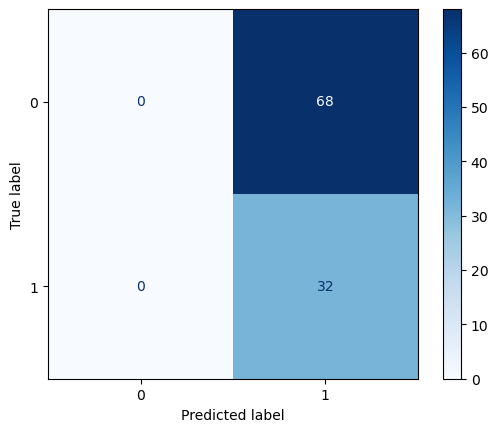

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test, cmap='Blues')  
plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [73]:
LR = LogisticRegression()
LR.fit(X_train_std,y_train)
predictions = LR.predict(X_test_std)

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [123]:
Age = float(input('Enter your Age :'))
Salary = float(input('Enter your Salary :'))
new_data = np.array([[Age, Salary]])
prediction = LR.predict(sc.transform(new_data))
print('This case belong to class ',prediction[0])

Enter your Age :30
Enter your Salary :90000
This case belong to class  0


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [124]:
Age = float(input('Enter your Age :'))
Salary = float(input('Enter your Salary :'))
new_data = np.array([[Age, Salary]])
prediction = LR.predict(sc.transform(new_data))
print('This case belong to class ',prediction[0])

Enter your Age :40
Enter your Salary :90000
This case belong to class  1
